In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
df = pd.read_csv("alltracks.csv", index_col=0)

In [80]:
df

,track_name,artist,album_name,date_listened,uts,url,tags
0,No Class,Motörhead,Overkill,NaN,NaN,https://www.last.fm/music/Mot%C3%B6rhead/_/No+...,"heavy metal, hard rock, metal, speed metal, se..."
1,2122,Geese,3D Country,"18 Feb 2024, 10:58",1.708254e+09,https://www.last.fm/music/Geese/_/2122,"indie rock, post-punk, art punk, Crank wave, d..."
2,Rodeo in Joliet,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:53",1.708254e+09,https://www.last.fm/music/The+Jesus+Lizard/_/R...,"noise rock, Grunge, alternative, noise, rock"
3,Lady Shoes,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:50",1.708253e+09,https://www.last.fm/music/The+Jesus+Lizard/_/L...,"noise rock, Grunge, alternative, noise, rock"
4,South Mouth,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:47",1.708253e+09,https://www.last.fm/music/The+Jesus+Lizard/_/S...,"noise rock, Grunge, alternative, noise, rock"
...,...,...,...,...,...,...,...
10486,Capricorn,Motörhead,Overkill,"22 Jul 2024, 00:36",1.721609e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/Cap...,"heavy metal, hard rock, metal, speed metal, se..."
10487,I'll Be Your Sister,Motörhead,Overkill,"22 Jul 2024, 00:33",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/I%2...,"heavy metal, hard rock, metal, speed metal, se..."
10488,(I Won't) Pay Your Price,Motörhead,Overkill,"22 Jul 2024, 00:30",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/(I+...,"heavy metal, hard rock, metal, speed metal, se..."
10489,Stay Clean,Motörhead,Overkill,"22 Jul 2024, 00:27",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/Sta...,"heavy metal, hard rock, metal, speed metal, se..."


Check for null values and inspect the data

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10491 entries, 0 to 10490
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_name     10491 non-null  object 
 1   artist         10491 non-null  object 
 2   album_name     10491 non-null  object 
 3   date_listened  10479 non-null  object 
 4   uts            10479 non-null  float64
 5   url            10491 non-null  object 
 6   tags           10491 non-null  object 
dtypes: float64(1), object(6)
memory usage: 655.7+ KB


In [82]:
df.isnull().sum()

track_name        0
artist            0
album_name        0
date_listened    12
uts              12
url               0
tags              0
dtype: int64

In [83]:
null_indices = df[df.isnull().any(axis=1)].index
df.drop(index=null_indices, inplace=True)

In [84]:
df.reset_index(drop=True, inplace=True)

In [85]:
df

,track_name,artist,album_name,date_listened,uts,url,tags
0,2122,Geese,3D Country,"18 Feb 2024, 10:58",1.708254e+09,https://www.last.fm/music/Geese/_/2122,"indie rock, post-punk, art punk, Crank wave, d..."
1,Rodeo in Joliet,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:53",1.708254e+09,https://www.last.fm/music/The+Jesus+Lizard/_/R...,"noise rock, Grunge, alternative, noise, rock"
2,Lady Shoes,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:50",1.708253e+09,https://www.last.fm/music/The+Jesus+Lizard/_/L...,"noise rock, Grunge, alternative, noise, rock"
3,South Mouth,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:47",1.708253e+09,https://www.last.fm/music/The+Jesus+Lizard/_/S...,"noise rock, Grunge, alternative, noise, rock"
4,Karpis,The Jesus Lizard,Goat (Remaster / Reissue),"18 Feb 2024, 10:44",1.708253e+09,https://www.last.fm/music/The+Jesus+Lizard/_/K...,"noise rock, Grunge, alternative, noise, rock"
...,...,...,...,...,...,...,...
10474,Capricorn,Motörhead,Overkill,"22 Jul 2024, 00:36",1.721609e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/Cap...,"heavy metal, hard rock, metal, speed metal, se..."
10475,I'll Be Your Sister,Motörhead,Overkill,"22 Jul 2024, 00:33",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/I%2...,"heavy metal, hard rock, metal, speed metal, se..."
10476,(I Won't) Pay Your Price,Motörhead,Overkill,"22 Jul 2024, 00:30",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/(I+...,"heavy metal, hard rock, metal, speed metal, se..."
10477,Stay Clean,Motörhead,Overkill,"22 Jul 2024, 00:27",1.721608e+09,https://www.last.fm/music/Mot%C3%B6rhead/_/Sta...,"heavy metal, hard rock, metal, speed metal, se..."


In [ ]:
df['tags'] = df['tags']

In [86]:
df['artist'].value_counts()

artist
Title Fight        807
David Bowie        490
The Strokes        487
Radiohead          465
Friko              315
                  ... 
Bill Evans Trio      1
Zuni                 1
ZAZEN BOYS           1
Anri                 1
Mariya Takeuchi      1
Name: count, Length: 240, dtype: int64

In [87]:
artist_counts = df.groupby('artist', 'genre')
top_10_artists = artist_counts[artist_counts.index < 10]
top_10_artists

,artist,count
0,Title Fight,807
1,David Bowie,490
2,The Strokes,487
3,Radiohead,465
4,Friko,315
5,The Pillows,309
6,Joy Division,301
7,Mitski,263
8,"Black Country, New Road",258
9,Beach House,243


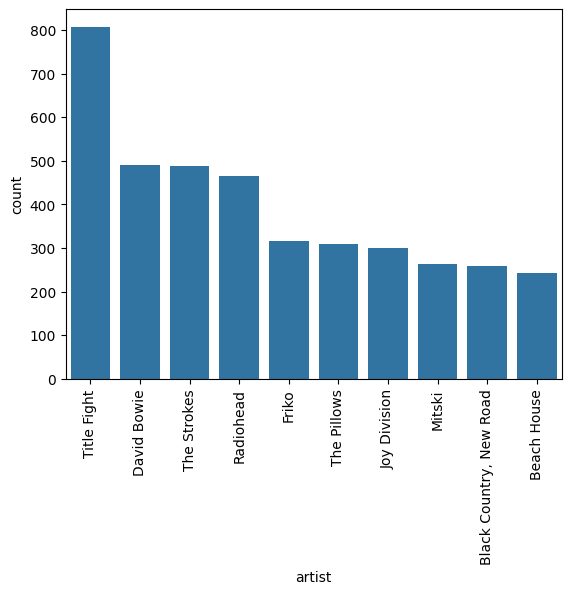

In [90]:
sns.barplot(top_10_artists, x='artist', y='count');
plt.xticks(rotation=90);